Description: This program creates a simple trading/investment strategy using support vector classifier (SVC) to classiffy whether stock price is greater then the previous day.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
# Load Data
df= yf.download('GOOG', period='1d', start='2020-01-01', end='2023-02-13')
# Show Data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000
...,...,...,...,...,...,...
2023-02-06,102.684998,104.699997,102.209999,103.470001,103.470001,25573000
2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000


In [4]:
# Create Independant Variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open']- df['Close']

In [8]:
# Create Dataset with Indepepndant Variables
X = df[['Open-Close','High-Low','Close']]
# Show Data
X.head()

,Open-Close,High-Low,Close
Date,,,
2020-01-02,-1.291000,1.329498,68.368500
2020-01-03,-0.639999,1.347801,68.032997
2020-01-06,-2.210503,2.324997,69.710503
2020-01-07,0.230003,0.630501,69.667000
2020-01-08,-0.612007,1.037003,70.216003


In [13]:
# Create Target Variable. 
# If tomorrows close price is greater then todays it will be marked 1, else 0. 1 means buy 0 means no position.
y = np.where(df.Close.shift(-1) > df.Close,1,0)
# Show Data
y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [37]:
# Split data into train(80%) and test set(20%)
split = 0.8
row = int(df.shape[0] * split)

# Create the train data set
X_train = X[:row].drop('Close', axis = 1)
y_train = y[:row]

# Create the test data set
X_test = X[row:].drop('Close', axis = 1)
y_test = y[row:]

In [38]:
# import Suport Vector Classifier (SVC) from sklearn
from sklearn.svm import SVC
# Create the model
model= SVC()
# Train Model
model.fit(X_train, y_train)

SVC()

In [39]:
# Check the score of the model on the train data set
model.score(X_train, y_train)

0.5773524720893142

In [41]:
# Check the score of the model on the test data set
model.score(X_test, y_test)

0.445859872611465

In [42]:
# Show the models predictions
df['Predictions'] = model.predict(X[['Open-Close','High-Low']])
# Show predictions
df['Predictions']

Date
2020-01-02    1
2020-01-03    1
2020-01-06    1
2020-01-07    1
2020-01-08    1
             ..
2023-02-06    1
2023-02-07    0
2023-02-08    1
2023-02-09    1
2023-02-10    1
Name: Predictions, Length: 784, dtype: int64

In [26]:
# Compare to Buy and hold Strategy
# Calcualte Daily Returns
df['Return'] = df['Close'].pct_change(1)
# Show Returns
df['Return']

Date
2020-01-02         NaN
2020-01-03   -0.004907
2020-01-06    0.024657
2020-01-07   -0.000624
2020-01-08    0.007880
                ...   
2023-02-06   -0.016632
2023-02-07    0.044167
2023-02-08   -0.074417
2023-02-09   -0.045400
2023-02-10   -0.006285
Name: Return, Length: 784, dtype: float64

In [27]:
# Calcualte Strategy Returns
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
# Show strat return
df['Strat_Return']

Date
2020-01-02         NaN
2020-01-03   -0.004907
2020-01-06    0.024657
2020-01-07   -0.000624
2020-01-08    0.007880
                ...   
2023-02-06   -0.016632
2023-02-07    0.044167
2023-02-08   -0.000000
2023-02-09   -0.045400
2023-02-10   -0.006285
Name: Strat_Return, Length: 784, dtype: float64

In [28]:
# Calculate Cumulative Returns
df['Cum_Return'] = df['Return'].cumsum()
# Calculate Cumulative Strategy Returns
df['Cum_Strategy'] = df['Strat_Return'].cumsum()

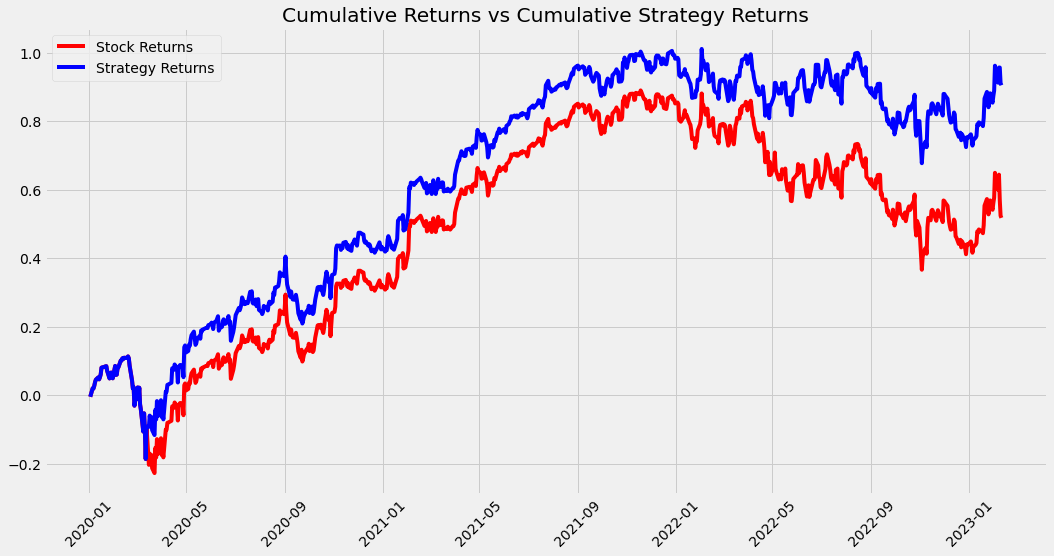

In [30]:
# Visualize Cumulative Returns vs Cumulative Strategy Returns

plt.figure(figsize = (16,8))
plt.title('Cumulative Returns vs Cumulative Strategy Returns')
plt.plot(df['Cum_Return'], color = 'red', label = 'Stock Returns')
plt.plot(df['Cum_Strategy'], color = 'blue', label = 'Strategy Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [32]:
#Print the returns
print('The Stock gives a return of', df['Cum_Return'][-1]*100, '%')
print('The Strategy gives a return of', df['Cum_Strategy'][-1]*100, '%')

The Stock gives a return of 51.74843399678457 %
The Strategy gives a return of 90.4693269664573 %


/Users/jacobfrench/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


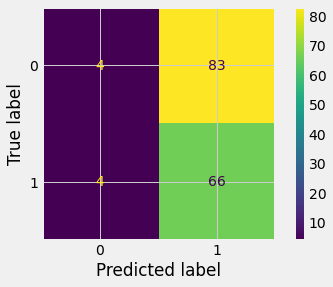

In [45]:
# Check Confusion Matrix
# Show confusion matrix of predictions
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test);
#Our Model is predicting majority as a buy signal. That is why we see such difference in returns
#Hence this project would need to be further optimised and back tested before use